#### Employee Attrition Prediction Problem.

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Also available directly within Watson Analytics as Employee Performance

Kaggle Link: https://www.kaggle.com/noordeen/employee-attrition

#### Import Necessary Libraries

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('HR-Employee-Attrition 2.csv')

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### EDA

In [34]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df['Age'].nunique()

43

In [6]:
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

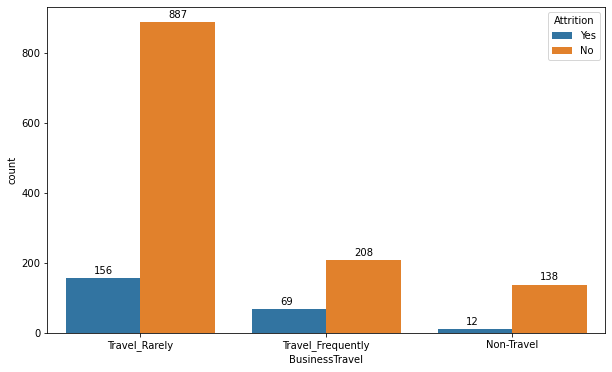

In [33]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['BusinessTravel'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

**Observation**:
* Travel Rarely category employee have more no. of no employee attrition.

In [32]:
df['DailyRate'].value_counts()

691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64

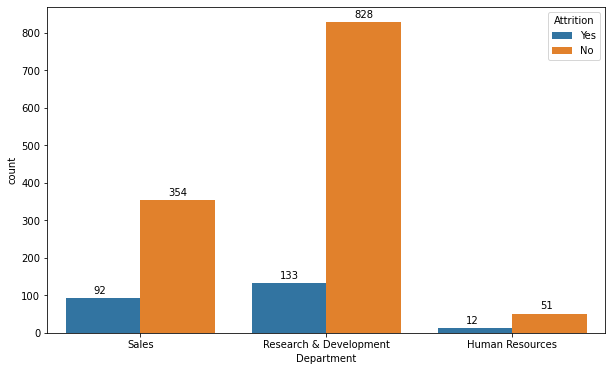

In [41]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['Department'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

**Observation**
* Looks like R&D department has more no employee attrition

In [45]:
df['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

**‘show me a breakdown of distance from home by job role and attrition’**

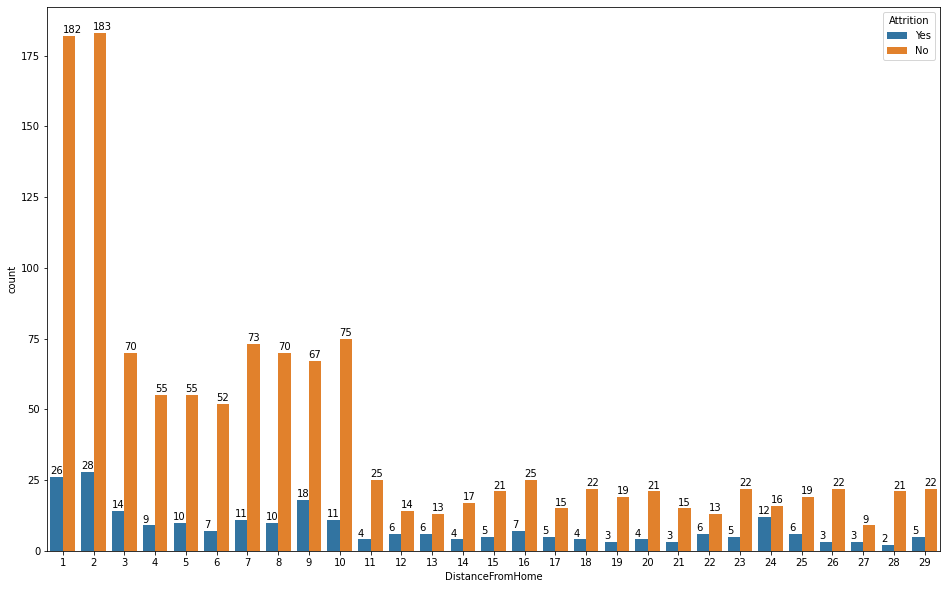

In [53]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['DistanceFromHome'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+1))

In [174]:
df.groupby(['JobRole', 'Attrition']).agg({'DistanceFromHome':np.mean})

DistanceFromHome
JobRole                   Attrition                  
Healthcare Representative No                 9.204918
                          Yes               17.666667
Human Resources           No                 6.600000
                          Yes               13.416667
Laboratory Technician     No                 9.329949
                          Yes                9.661290
Manager                   No                 7.927835
                          Yes               10.000000
Manufacturing Director    No                 9.533333
                          Yes                8.800000
Research Director         No                 8.474359
                          Yes                7.000000
Research Scientist        No                 8.869388
                          Yes                9.765957
Sales Executive           No                 9.026022
                          Yes               12.649123
Sales Representative      No                 9.000000
                          Yes                8.151515

**Observation**
* People with less Distance from Home have the less chances of lead to Employee Attrition
* People with higher Distance from Home may lead to employee attrition 

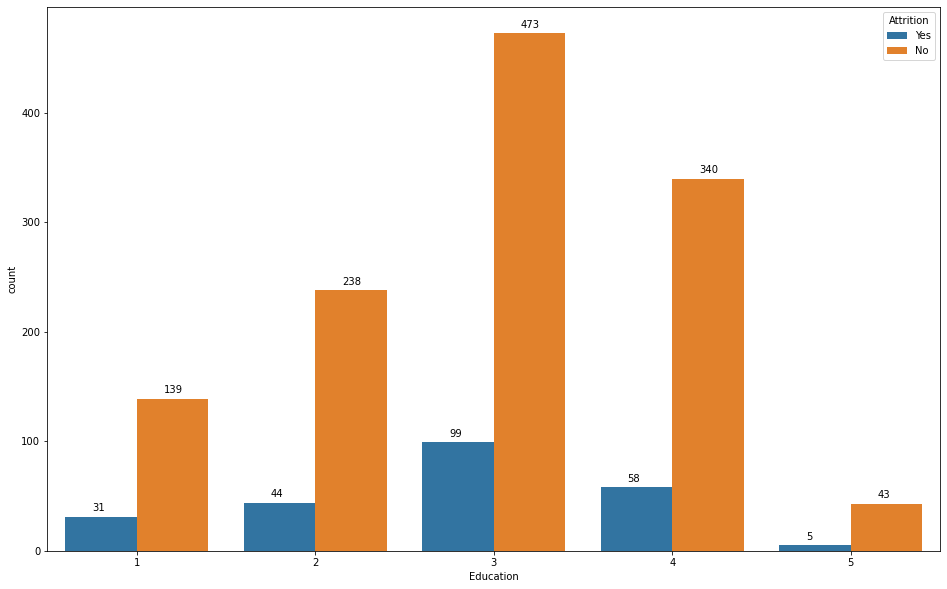

In [65]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['Education'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

**Observation**
* 3rd level education category employee has higher possibility no employee attrition

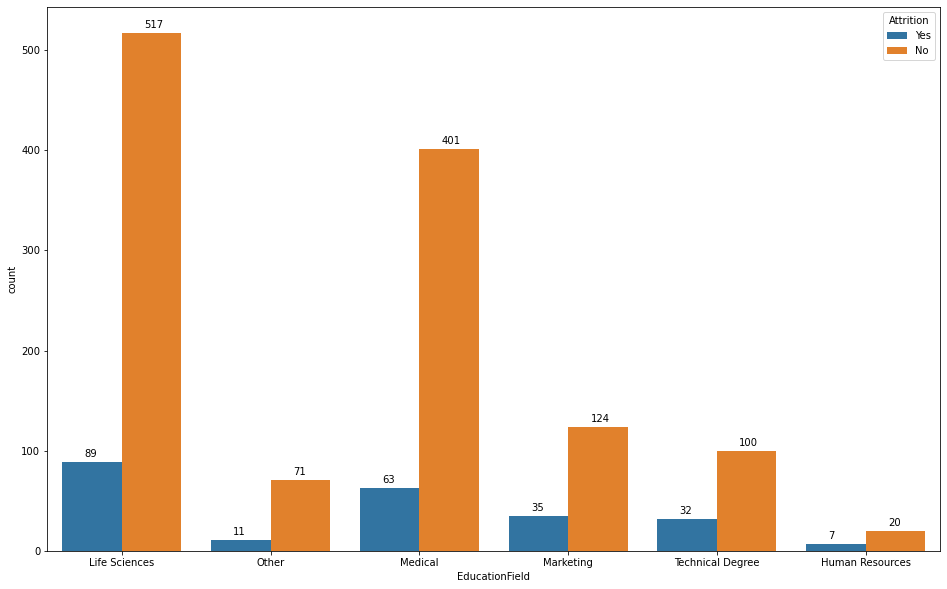

In [66]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['EducationField'], hue = df['Attrition'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))

**Observation**
* Life Sciences education field employee has higher possibility no employee attrition

In [74]:
df['EmployeeCount'].value_counts()
#Employee count column has only one value in all rows, so probably we can drop this column

1    1470
Name: EmployeeCount, dtype: int64

In [76]:
df['EmployeeNumber'].nunique()
#Each row of Employee Number column has unique value. 

1470

In [78]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

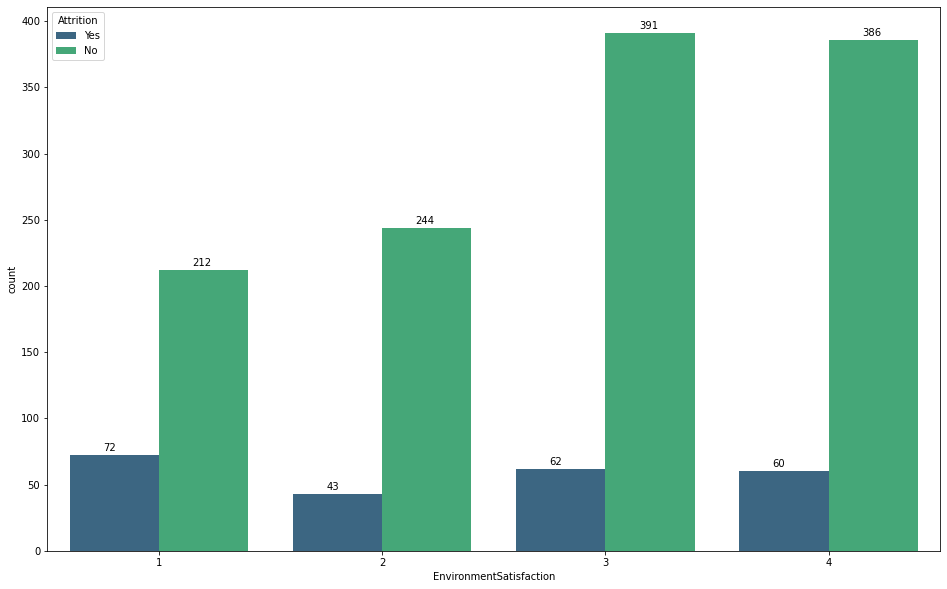

In [85]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['EnvironmentSatisfaction'], hue = df['Attrition'], palette='viridis')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+3))

**Observation**:
* Environment Satisfaction with value 3 & 4 have higher chance of No Employee Attrition 

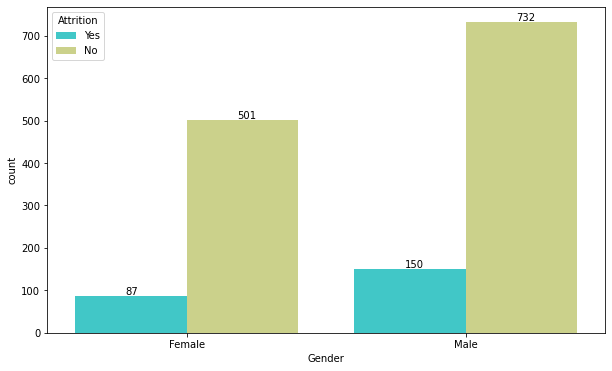

In [90]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['Gender'], hue = df['Attrition'], palette='rainbow')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+3))

**Observation**:
* Male employee has more no. of NO Employee attrition

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

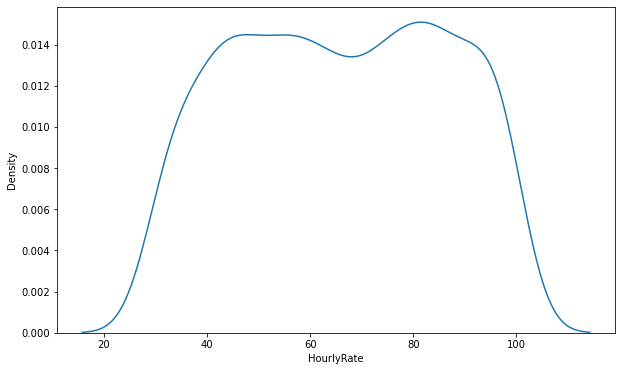

In [93]:
plt.figure(figsize=(10,6))
sns.kdeplot(x = df['HourlyRate']) 

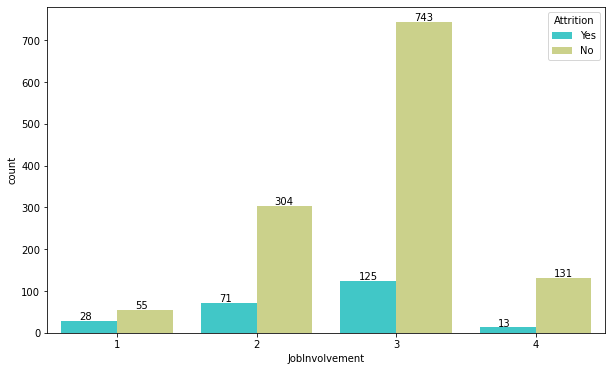

In [98]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['JobInvolvement'], hue = df['Attrition'], palette='rainbow')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+3))

**Observations:**
* JobInvolvement 3 has more no. of No Employee Attrition 

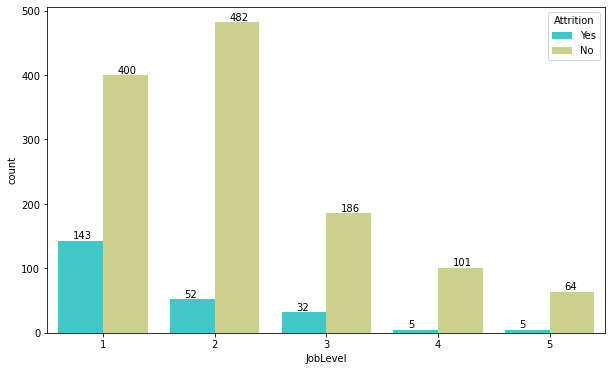

In [99]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['JobLevel'], hue = df['Attrition'], palette='rainbow')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+3))

**Observation**:
* Job Level 2 has higher possibility of No Employee Attrition.


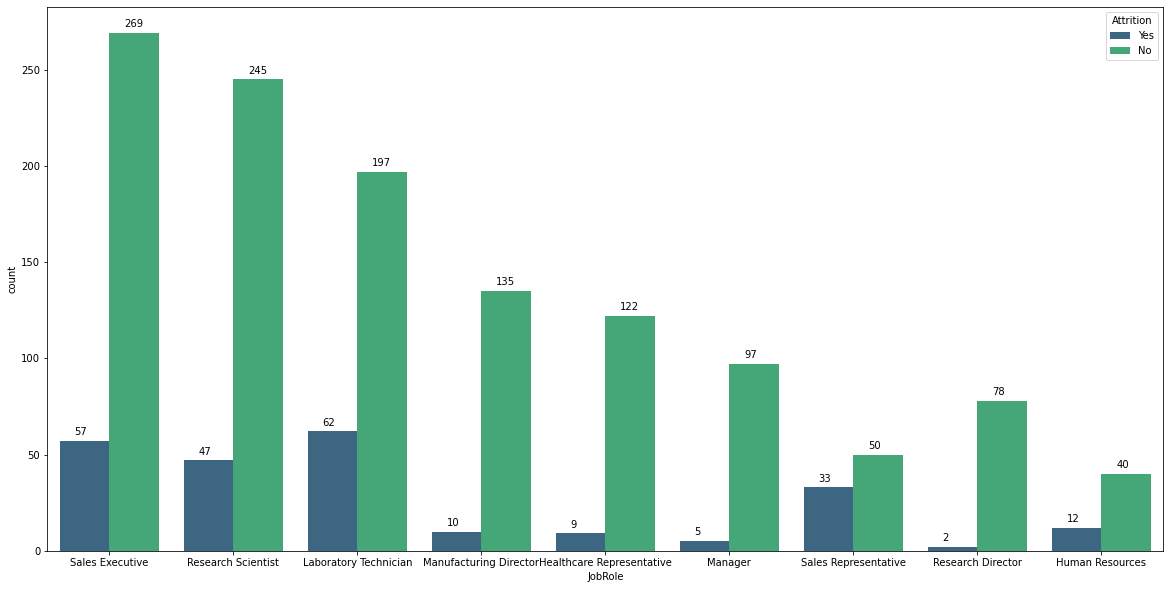

In [114]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['JobRole'], hue = df['Attrition'], palette='viridis')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+3))

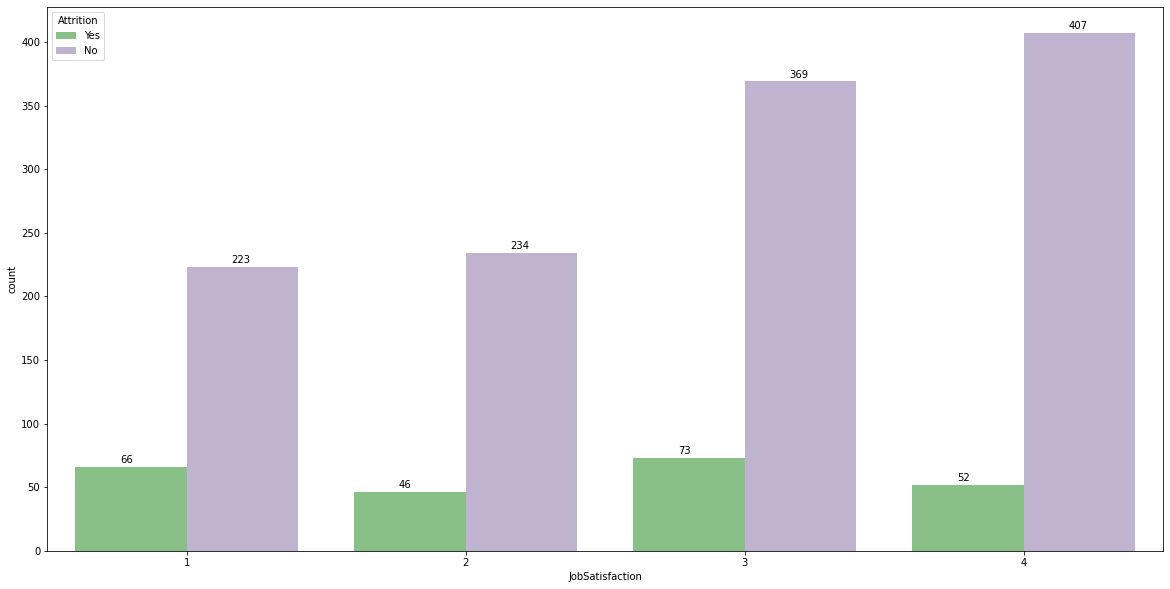

In [121]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['JobSatisfaction'], hue = df['Attrition'], palette='Accent')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+3))

**Observation**:
* Job Statisfaction level 4 has higher chance of no employee attrition.

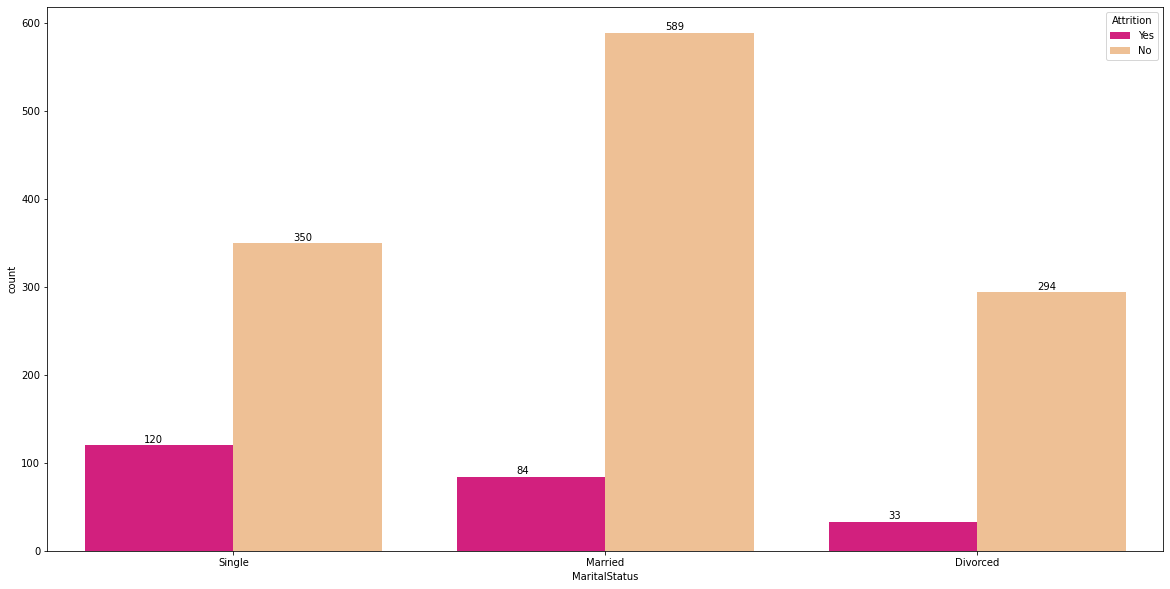

In [123]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['MaritalStatus'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+3))

**Observation**:
* Married People has more probability No Employee Attrition.

In [128]:
df['MonthlyIncome'].nunique()

1349

In [129]:
df['MonthlyRate'].nunique()

1427

**Compare average monthly income by education and attrition**

<AxesSubplot:xlabel='MonthlyIncome', ylabel='MonthlyRate'>

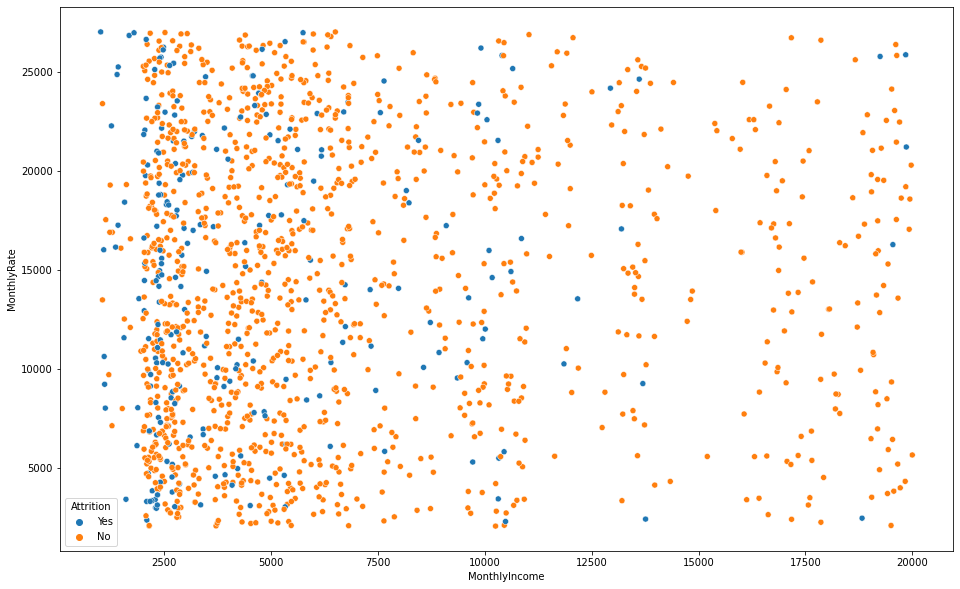

In [132]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = df['MonthlyIncome'], y = df['MonthlyRate'], hue = df['Attrition'])

In [184]:
df.groupby(['Education', 'Attrition']).agg({'MonthlyIncome':np.mean})

MonthlyIncome
Education Attrition               
1         No           5926.129496
          Yes          4360.161290
2         No           6586.058824
          Yes          4282.545455
3         No           6882.919662
          Yes          4770.242424
4         No           7087.814706
          Yes          5335.155172
5         No           8559.906977
          Yes          5850.200000

**Observation**:
* Education level 5 and Employee Attrition No have higher average of Monthly Income

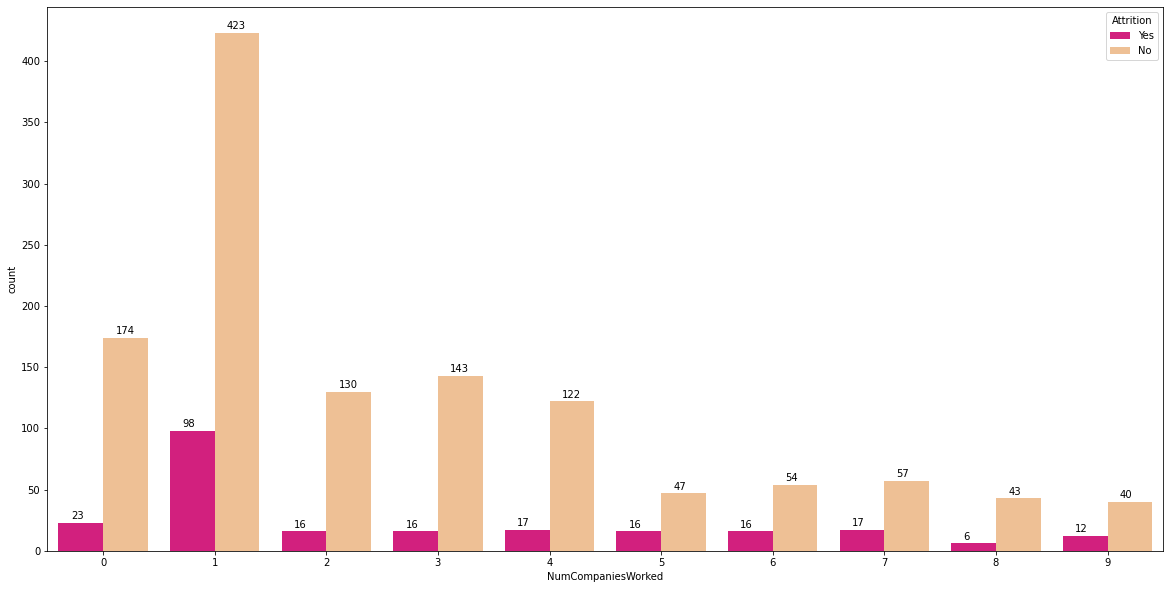

In [137]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['NumCompaniesWorked'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+3))

**Observation**:
* Employee's Num of Companies Worked in 1 has more chance of No employee attrition 

In [140]:
df['Over18'].nunique()
#This column has only one unique column, so we can drop this column

1

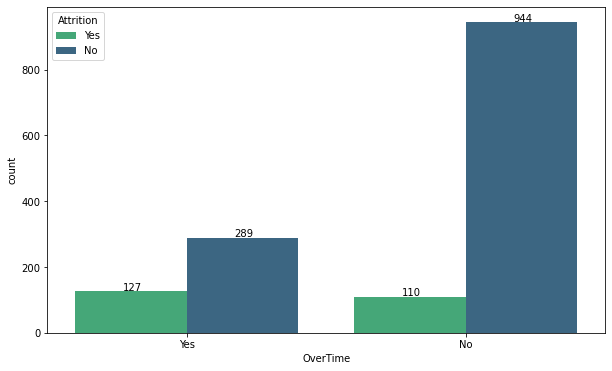

In [147]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['OverTime'], hue = df['Attrition'], palette='viridis_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.17, p.get_height()+3))

**Observation**:
* No Overtime employee have higher chance of no employee attrition

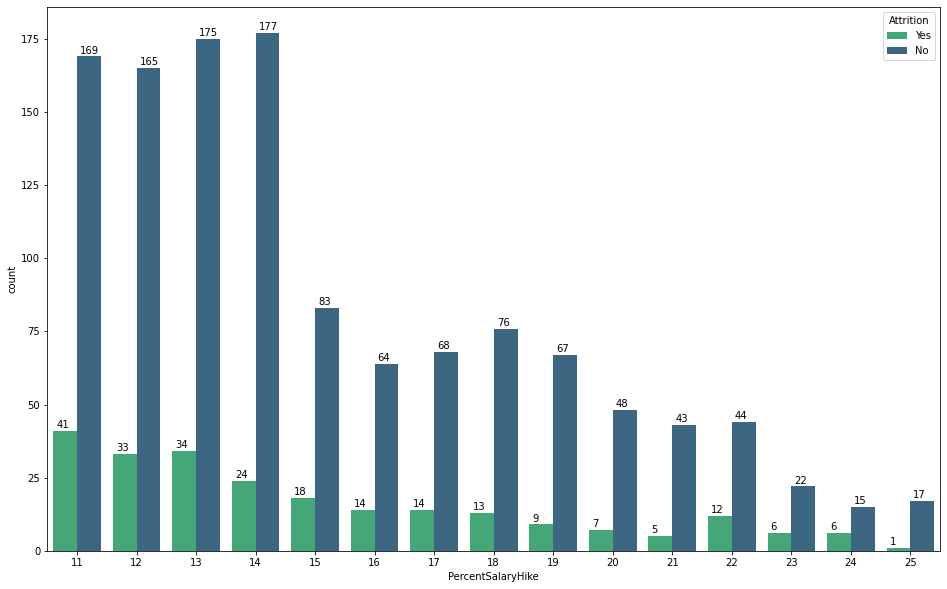

In [161]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['PercentSalaryHike'], hue = df['Attrition'], palette='viridis_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))

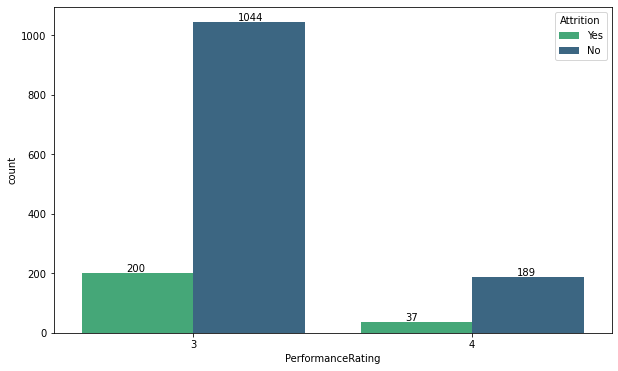

In [198]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['PerformanceRating'], hue = df['Attrition'], palette='viridis_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+5))

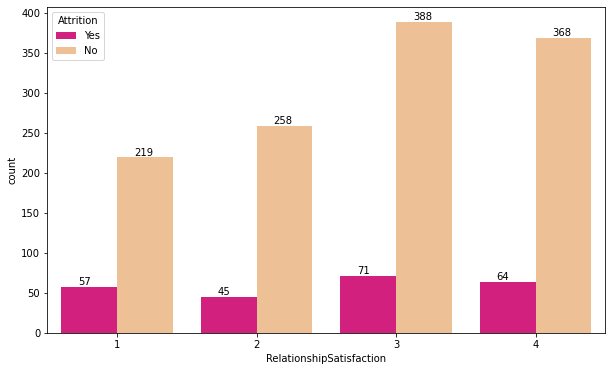

In [240]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['RelationshipSatisfaction'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+3))

In [204]:
df['StandardHours'].nunique()
#Standard Hours column has only one unique value, so we can drop that column

1

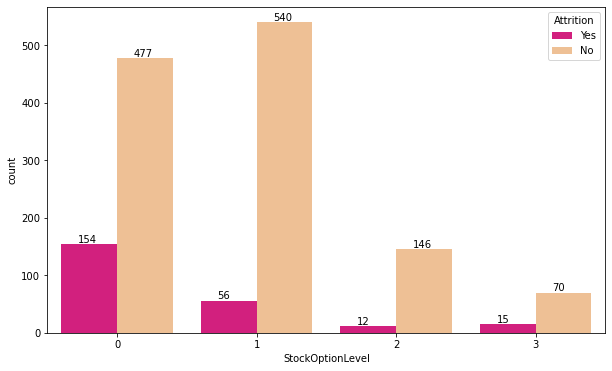

In [205]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['StockOptionLevel'], hue = df['Attrition'], palette='Accent_r')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+3))

**Observation**
* Stock Option level 0 and 1 have higher possibility of No employee attrition

In [249]:
def value(col):
    plt.figure(figsize = (16,10))
    ax = sns.countplot(x = df[col], hue = df['Attrition'], palette='Accent_r')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.1, p.get_height()+2))
    plt.tight_layout()
    plt.show()
   

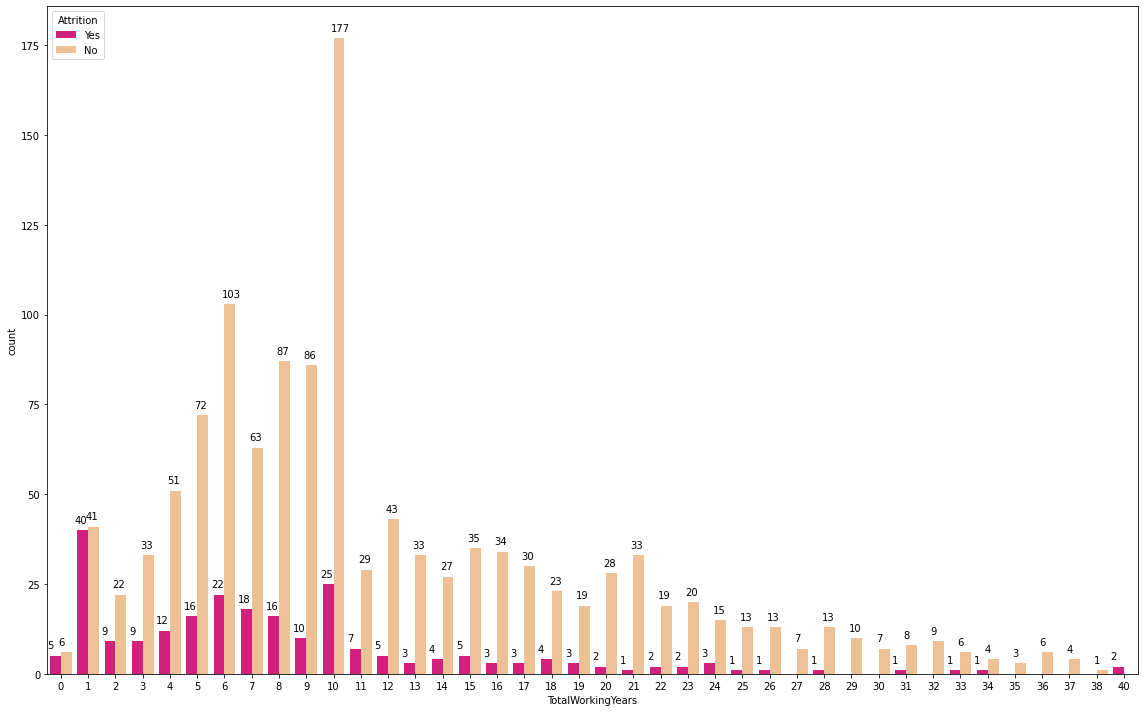

In [250]:
value('TotalWorkingYears')

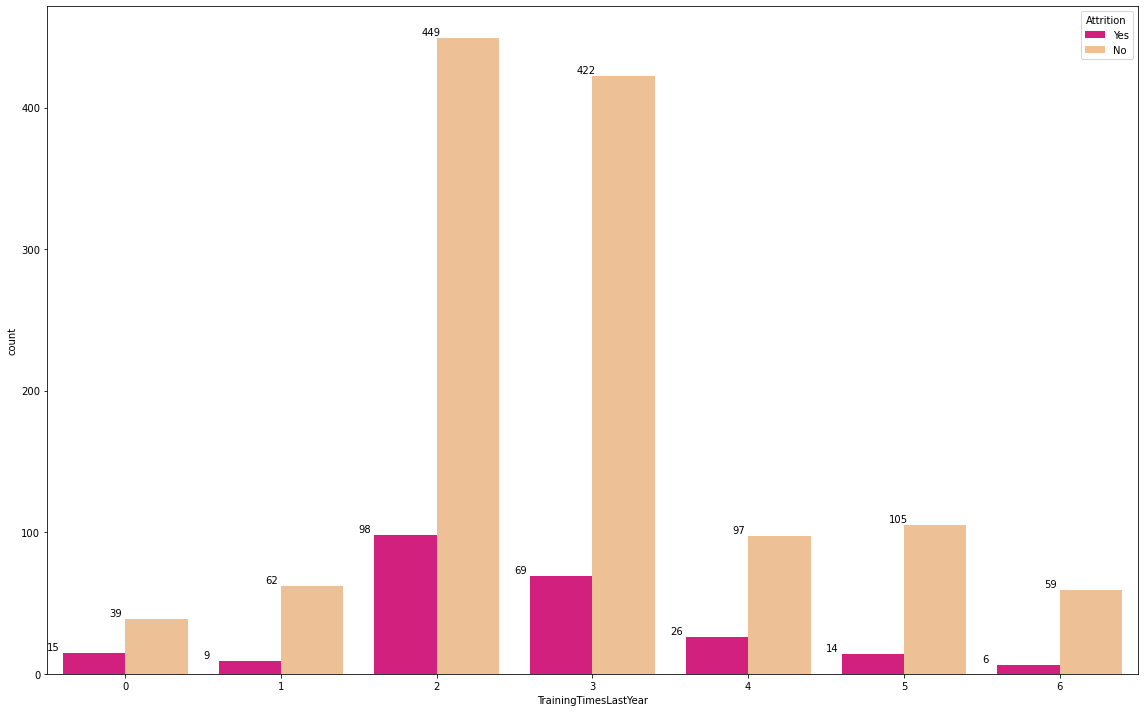

In [252]:
value('TrainingTimesLastYear')

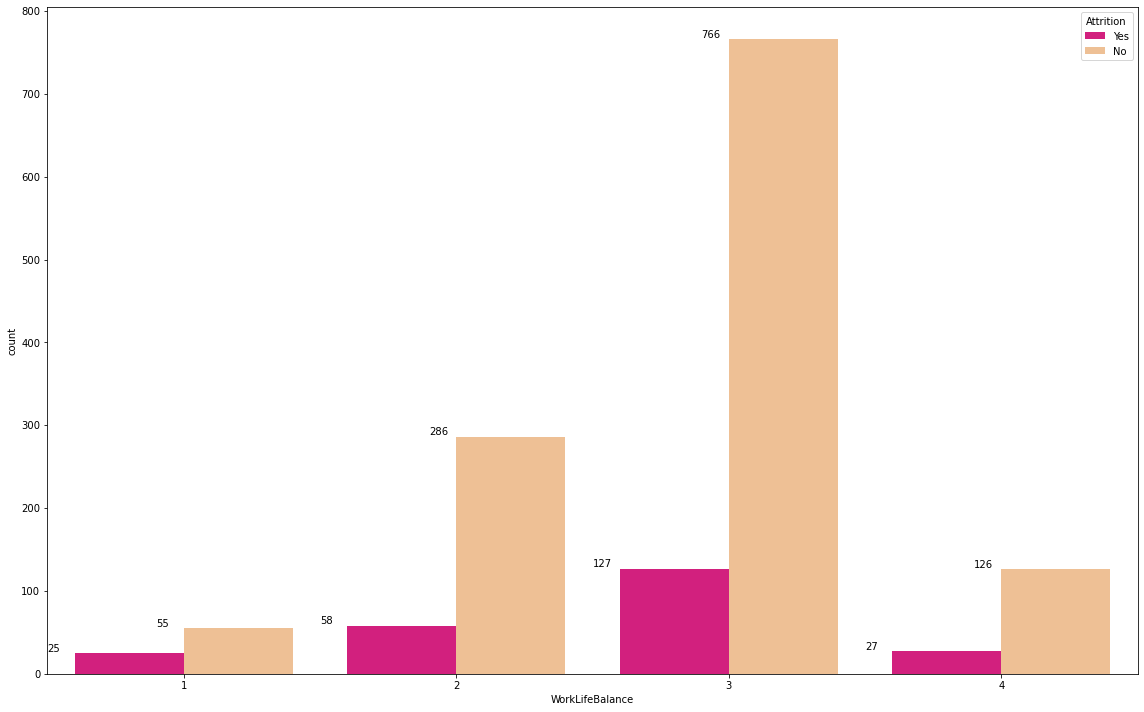

In [253]:
value('WorkLifeBalance')

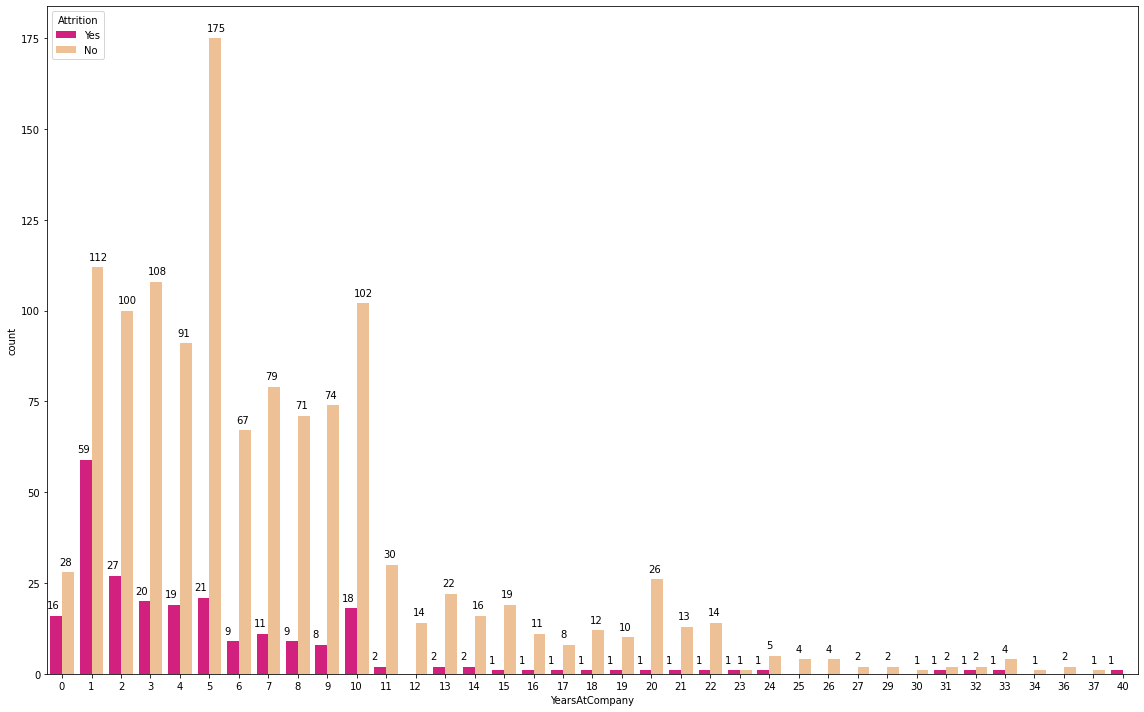

In [254]:
value('YearsAtCompany')

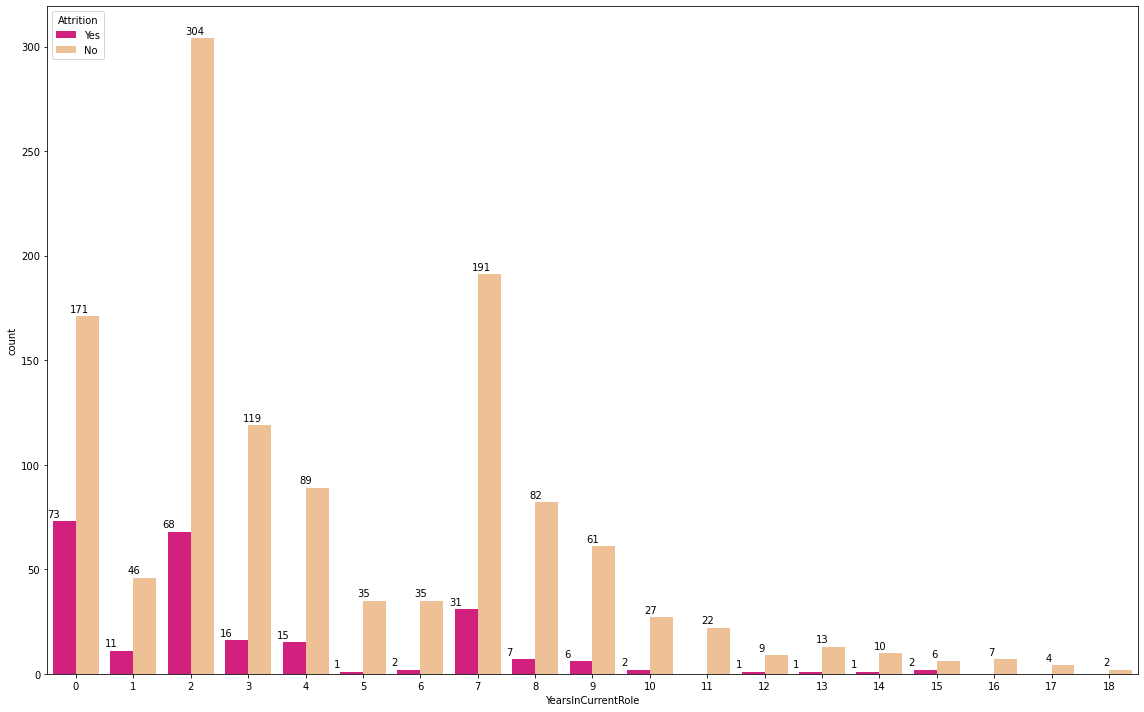

In [255]:
value('YearsInCurrentRole')

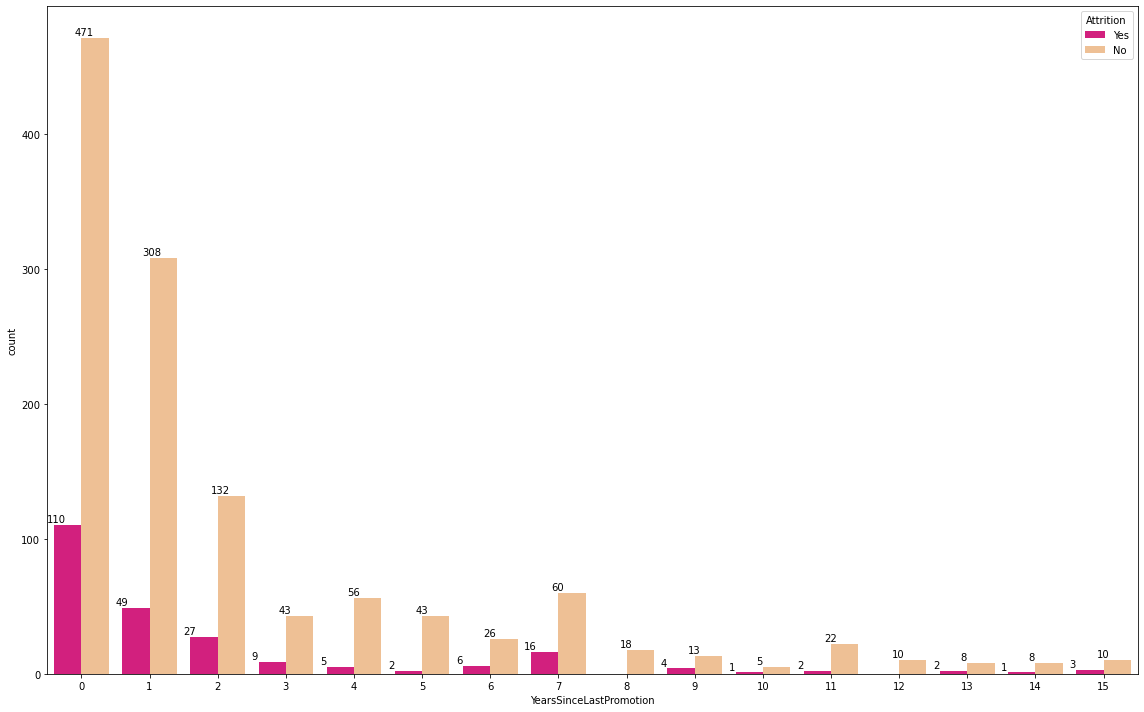

In [256]:
value('YearsSinceLastPromotion')

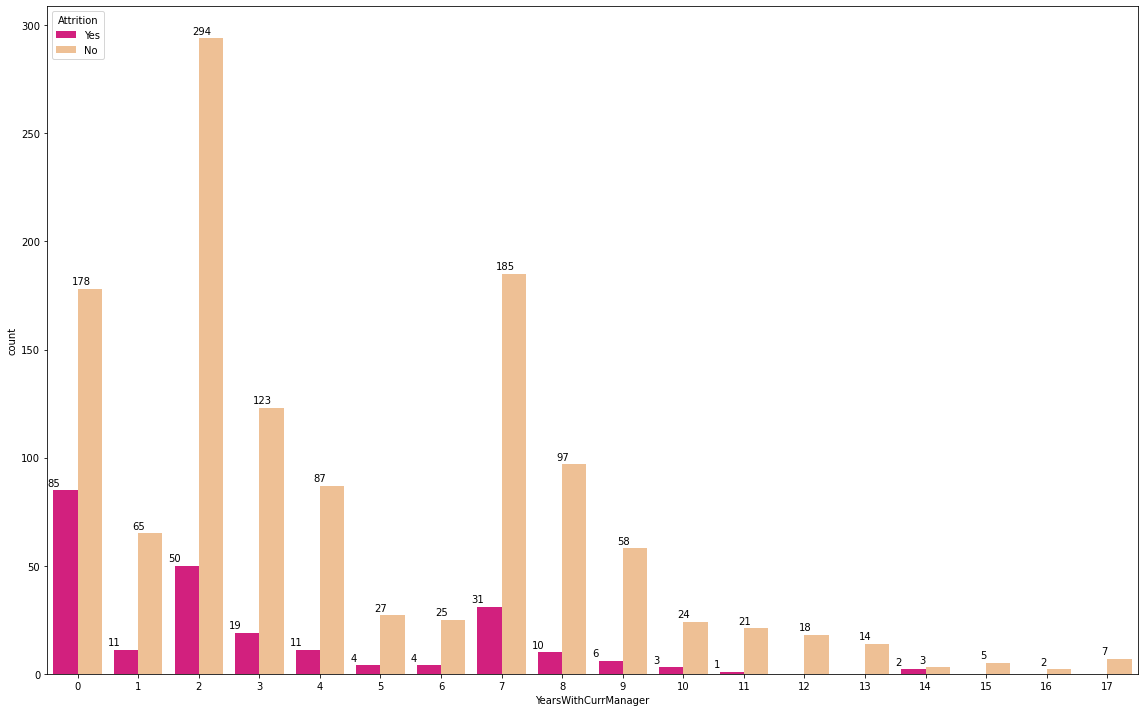

In [257]:
value('YearsWithCurrManager')

#### Feature Engineering

In [331]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [337]:
df['MonthlyIncome'].nunique()

1349

In [379]:
final_df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis =1)

In [388]:
final_df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,No,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [380]:
cat_columns = final_df.select_dtypes(exclude = np.number).columns

In [389]:
cat_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [381]:
encode_df  = pd.DataFrame(index=final_df.index)

In [382]:
encode_df = pd.get_dummies(final_df[cat_columns[1:]])

In [383]:
encode_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [384]:
final_df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)

In [385]:
final_concat_df = pd.concat([final_df,encode_df], axis =1)

In [386]:
X = final_concat_df.drop('Attrition', axis =1)
y = final_concat_df['Attrition']

#### Scaling

In [391]:
sc = StandardScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [392]:
X_scaled

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,-0.3371,2.075297,-1.562889,-0.211604,0.72

#### Spliting

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

#### Modelling

In [434]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [496]:
lg = LogisticRegression(penalty='l2', class_weight={'Yes':0.3, 'No':0.7})

lg.fit(X_train, y_train)

LogisticRegression(class_weight={'No': 0.7, 'Yes': 0.3})

In [497]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [498]:
#train_data
def metrics(y_true,y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

In [499]:
print('Train Metrics')
metrics(y_train, train_pred)

Train Metrics
Confusion Matrix:
 [[843   6]
 [135  45]]


Accuracy Score:
 0.8629737609329446


Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       849
         Yes       0.88      0.25      0.39       180

    accuracy                           0.86      1029
   macro avg       0.87      0.62      0.66      1029
weighted avg       0.87      0.86      0.83      1029



In [495]:
print('Test Metrics')
metrics(y_test, test_pred)

Test Metrics
Confusion Matrix:
 [[381   3]
 [ 35  22]]


Accuracy Score:
 0.9138321995464853


Classification Report: 
               precision    recall  f1-score   support

          No       0.92      0.99      0.95       384
         Yes       0.88      0.39      0.54        57

    accuracy                           0.91       441
   macro avg       0.90      0.69      0.74       441
weighted avg       0.91      0.91      0.90       441



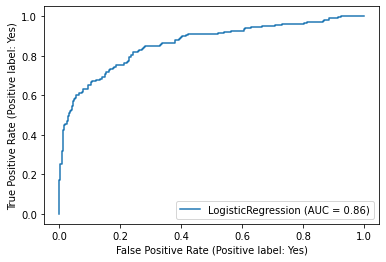

In [500]:
plot_roc_curve(lg, X_train, y_train)

#### KNN

In [399]:
from sklearn.neighbors import KNeighborsClassifier

In [400]:
knn = KNeighborsClassifier(n_neighbors=7,n_jobs=-8)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-8, n_neighbors=7)

In [401]:
train_pred_knn = knn.predict(X_train)

test_pred_knn = knn.predict(X_test)

In [402]:
print('Train Metrics')

metrics(y_train, train_pred_knn)

Train Metrics
Confusion Matrix:
 [[843   6]
 [137  43]]


Accuracy Score:
 0.8610301263362488


Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       849
         Yes       0.88      0.24      0.38       180

    accuracy                           0.86      1029
   macro avg       0.87      0.62      0.65      1029
weighted avg       0.86      0.86      0.83      1029



In [403]:
print('Test Metrics')

metrics(y_test, test_pred_knn)

Test Metrics
Confusion Matrix:
 [[378   6]
 [ 48   9]]


Accuracy Score:
 0.8775510204081632


Classification Report: 
               precision    recall  f1-score   support

          No       0.89      0.98      0.93       384
         Yes       0.60      0.16      0.25        57

    accuracy                           0.88       441
   macro avg       0.74      0.57      0.59       441
weighted avg       0.85      0.88      0.85       441



#### Naive Bayes 

In [372]:
from sklearn.naive_bayes import GaussianNB

In [404]:
gb = GaussianNB()

gb.fit(X_train, y_train)

GaussianNB()

In [405]:
train_pred_gb = gb.predict(X_train)

test_pred_gb = gb.predict(X_test)

In [406]:
print('Train Metrics')

metrics(y_train, train_pred_gb)

Train Metrics
Confusion Matrix:
 [[576 273]
 [ 41 139]]


Accuracy Score:
 0.6948493683187561


Classification Report: 
               precision    recall  f1-score   support

          No       0.93      0.68      0.79       849
         Yes       0.34      0.77      0.47       180

    accuracy                           0.69      1029
   macro avg       0.64      0.73      0.63      1029
weighted avg       0.83      0.69      0.73      1029



In [407]:
print('Test Metrics')

metrics(y_test, test_pred_gb)

Test Metrics
Confusion Matrix:
 [[279 105]
 [ 12  45]]


Accuracy Score:
 0.7346938775510204


Classification Report: 
               precision    recall  f1-score   support

          No       0.96      0.73      0.83       384
         Yes       0.30      0.79      0.43        57

    accuracy                           0.73       441
   macro avg       0.63      0.76      0.63       441
weighted avg       0.87      0.73      0.78       441

